In [1]:
# importing the neccessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file into a pandas DataFrame
boston=pd.read_csv(r"C:\Users\joshua\Documents\Josh\@datasets\BostonHousing.csv")

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
boston.shape

(506, 14)

In [6]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [7]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
boston.duplicated().sum()

0

## Exploratory Data Analysis

In [10]:
# Identify numeric columns only
numeric_cols = boston.select_dtypes(include=['float64', 'int64']).columns

# Detect outliers
outliers = pd.DataFrame()

for col in numeric_cols:
    Q1 = boston[col].quantile(0.25)
    Q3 = boston[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((boston[col] < lower_bound) | (boston[col] > upper_bound))

# Count of outliers per column
outliers.sum().sort_values(ascending=False)


b          77
zn         68
crim       66
medv       40
chas       35
rm         30
ptratio    15
lstat       7
dis         5
indus       0
nox         0
age         0
rad         0
tax         0
dtype: int64

In [11]:
sns.set()

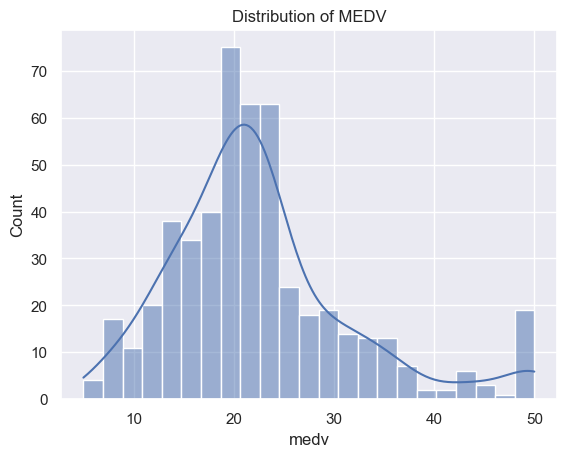

In [12]:
sns.histplot(boston['medv'], kde=True)
plt.title('Distribution of MEDV')
plt.grid(True)
plt.savefig('Distribution of MEDV.png')
plt.show()

In [14]:
# Correlation check using correlation Matrix
correlation_matrix= boston.corr().round(2)
ddf=pd.DataFrame(correlation_matrix)

ddf

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [15]:
correlation_matrix["medv"].sort_values(ascending=False).round(2)

medv       1.00
rm         0.70
zn         0.36
b          0.33
dis        0.25
chas       0.18
age       -0.38
rad       -0.38
crim      -0.39
nox       -0.43
tax       -0.47
indus     -0.48
ptratio   -0.51
lstat     -0.74
Name: medv, dtype: float64

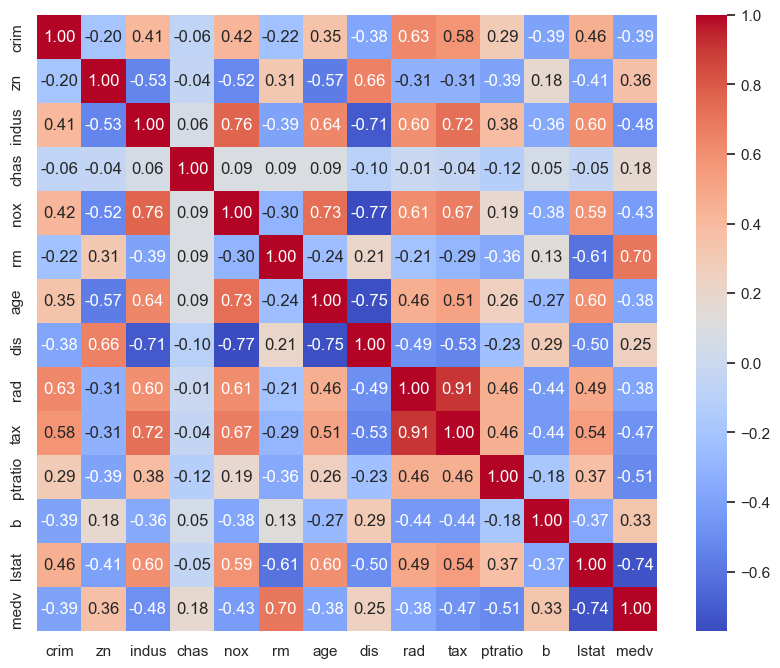

In [17]:
# Plot heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.savefig('Correlation Visualization.png')
plt.show()

### 📌 Dropping the `rad` Feature to Reduce Multicollinearity

The `rad` feature shows a very high correlation with `tax` (correlation coefficient ≈ 0.91).  
To reduce multicollinearity, we drop `rad` from the dataset:


In [18]:
boston=boston.drop("rad", axis=1)

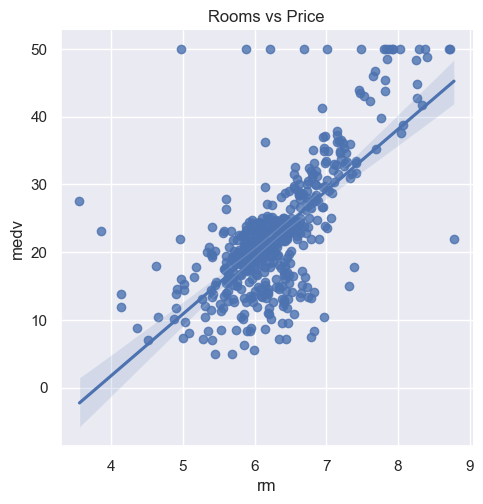

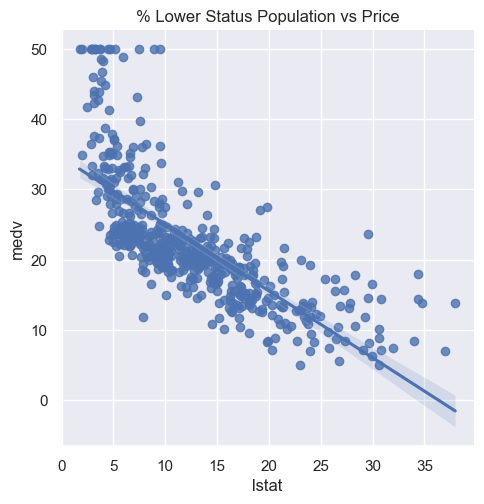

In [20]:
# plotting important features with the target variable
sns.lmplot(x='rm', y='medv', data=boston)
plt.title('Rooms vs Price')
plt.show()

sns.lmplot(x='lstat', y='medv', data=boston)
plt.title('% Lower Status Population vs Price')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [23]:
# Separating into independent and dependent
X=boston.drop('medv', axis=1)
y=boston['medv']

In [24]:
# Spliting into train and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [26]:
# Creating a model
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Model Evaluation
# print the intercept
print(model.intercept_)

24.26087010315362


In [28]:
coeff_df=pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
crim,-0.081353
zn,0.022090
indus,-0.014986
chas,3.129739
nox,-15.547839
rm,4.726614
age,-0.009597
dis,-1.428513
tax,0.000966
ptratio,-0.815257


In [29]:
# Predictions from our Model
predictions=model.predict(X_test)

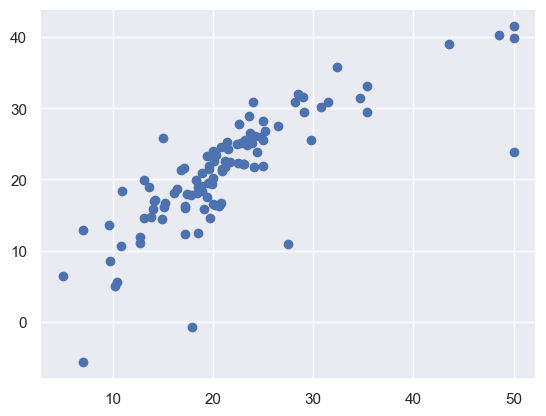

In [30]:
plt.scatter(y_test, predictions)
plt.show()

In [31]:
r2=r2_score(y_test, predictions)
mse=mean_squared_error(y_test, predictions)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.639034773895143
Mean Squared Error: 26.470945619590537


In [32]:
def remove_outliers_iqr(data, columns):
    df_clean = boston.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Remove based on these columns
outlier_cols = ['b', 'zn', 'crim', 'medv', 'rm']
df_cleaned = remove_outliers_iqr(boston, outlier_cols)


In [33]:
X_clean = df_cleaned.drop('medv', axis=1)
y_clean = df_cleaned['medv']

# Split again
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train
model_without_outliers = LinearRegression()
model_without_outliers.fit(X_train_c, y_train_c)

# Predict
y_pred_without_outliers = model_without_outliers.predict(X_test_c)

# Evaluate
mse_without = mean_squared_error(y_test_c, y_pred_without_outliers)
r2_without = r2_score(y_test_c, y_pred_without_outliers)

print("\nModel WITHOUT Outliers:")
print("MSE:", round(mse_without, 2))
print("R² Score:", round(r2_without, 2))



Model WITHOUT Outliers:
MSE: 6.32
R² Score: 0.77
